<a href="https://colab.research.google.com/github/bakanino/PHYS4016/blob/main/t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import keras
from keras.layers import InputLayer, Dense
from tensorflow.random import set_seed
set_seed(0)
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [3]:
drive_path = '/content/drive/MyDrive/'
input_images = np.load(drive_path+'X_kannada_MNIST_60K.npz')['arr_0']
input_labels = np.load(drive_path+'y_kannada_MNIST_60K.npz')['arr_0']

In [4]:
input_labels[:21], np.unique(input_labels)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0],
       dtype=uint8), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    input_images, 
    input_labels, 
    test_size=0.2, 
    shuffle=True,
    random_state=42)

In [7]:
for _ in [X_train, X_test, y_train, y_test]:
  print(_.shape)

(48000, 28, 28)
(12000, 28, 28)
(48000,)
(12000,)


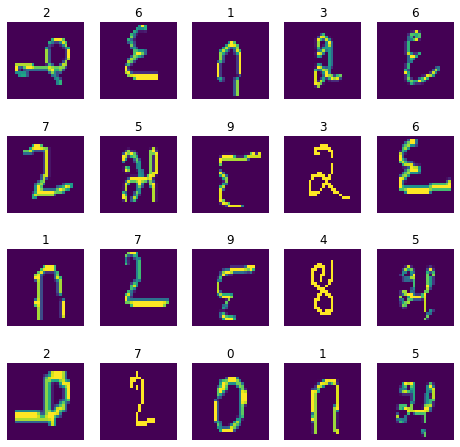

In [8]:
plt.figure(figsize=(8,8))

x, y = 5, 4
for i in range(20):  
    plt.subplot(y, x, i+1)
    plt.title(str(y_train[i]))
    plt.axis('off')
    plt.imshow(X_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [9]:
#from sklearn.decomposition import PCA

In [10]:
#pca = PCA(n_components=3)
#pca_result = pca.fit_transform(input_images[input_labels])

In [11]:
from sklearn.manifold import TSNE
import time

In [12]:
nsamples, nx, ny = input_images.shape
d2_X = input_images.reshape((nsamples,nx*ny))
d2_X.shape
X, y = d2_X, input_labels

In [13]:
rndperm = np.random.permutation(y.shape[0])

In [14]:
N = 5000
y_subset = y[rndperm[:N]].copy()
X_subset = X[rndperm[:N],:].copy()
y_subset.shape, X_subset.shape

((5000,), (5000, 784))

In [16]:
def tsne(p):
  tsne = TSNE(random_state=42, n_components=2, verbose=1, perplexity=p, n_iter=300).fit_transform(X_subset)
  plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
  plt.gca().set_aspect('equal', 'datalim')
  plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
  plt.title('t-SNE, perplexity=%d' % p, fontsize=20)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs
[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.004s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 5000 samples in 1.311s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 273.838009
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.027603
[t-SNE] KL divergence after 300 iterations: 3.393018
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.004s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 5000 samples in 1.287s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 337.643050
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.680115
[t-SNE] KL divergence after 300 iterations: 3.156982
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.004s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 5000 samples in 1.329s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 402.495980
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.834137
[t-SNE] KL divergence after 300 iterations: 2.783784
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.004s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 5000 samples in 1.307s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 455.043133
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.875610
[t-SNE] KL divergence after 300 iterations: 2.389330


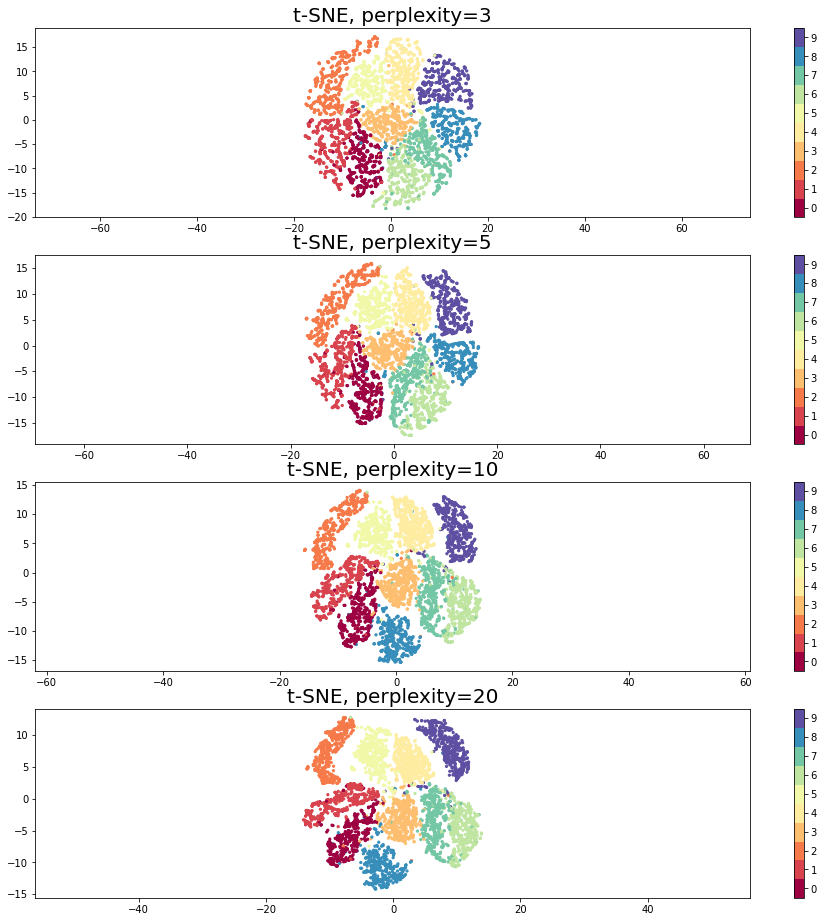

In [20]:
%time
plt.figure(figsize=(16,16))
for i, _ in enumerate([3, 5, 10, 20]):
  plt.subplot(4, 1, i+1)
  tsne(_)